输入图像-grabcut抓前景背景-最大连通域消除外部-Marr求边缘-腐蚀消除内部垃圾

In [2]:
import numpy as np
import cv2
import torch
from matplotlib import pyplot as plt

def cv_show(name,img):
    cv2.imshow(name,img)   #显示原图
    if cv2.waitKey(0) == 27:
        cv2.destroyAllWindows()
    if cv2.waitKey(0):
        cv2.destroyAllWindows()
#grabCut分割
from matplotlib import pyplot as plt
img = cv2.imread('tu_.png')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#gray = cv2.equalizeHist(gray)#均衡
#gray = cv2.GaussianBlur(gray, (5, 5), 0)#高斯滤波

# 创建于读入图像，相同大小的掩模
mask = np.zeros(img.shape[:2],np.uint8)
 
# 创建以0填充的前景和背景模型
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)
 
rect = (21,1,660,428)
cv2.grabCut(img, mask, rect, bgdModel,fgdModel,6,cv2.GC_INIT_WITH_RECT)
 
# 此时的掩模已经变成了0-3之间的数字，
mask2 = np.where((mask == 2) | (mask == 0),0,1).astype('uint8')
 
img1 = img * mask2[:,:,np.newaxis]
gray = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
gray_o=gray
contours,hierarchy = cv2.findContours(gray,cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
 
#找到最大区域并填充
 
area = []
 
for j in range(len(contours)):
 
    area.append(cv2.contourArea(contours[j]))
 
max_idx = np.argmax(area)
 
max_area = cv2.contourArea(contours[max_idx])
 
for k in range(len(contours)):
 
    if k != max_idx:
        cv2.fillPoly(gray, [contours[k]], 0)

IMG=gray;

#k = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
k = np.ones((4, 4), np.uint8)
open = cv2.morphologyEx(IMG, cv2.MORPH_OPEN, k)
close = cv2.morphologyEx(IMG, cv2.MORPH_CLOSE, k)
k = np.ones((4, 4), np.uint8)
thresh = cv2.threshold(close, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
thresh = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, k)
binary=thresh
dst = cv2.Laplacian(binary, cv2.CV_16S, ksize = 3)
Laplacian = cv2.convertScaleAbs(dst)
ret, binary = cv2.threshold(Laplacian, 127, 255, cv2.THRESH_BINARY)

threshCnts=[]
hierarchy=[]
threshCnts, hierarchy = cv2.findContours(thresh.copy(), cv2.RETR_LIST,	cv2.CHAIN_APPROX_SIMPLE)
 
cnts = threshCnts
cur_img = img.copy()

num=0
locs=[]
for (i, c) in enumerate(cnts):
    # 计算矩形
    (x, y, w, h) = cv2.boundingRect(c)
    ar = w / float(h)
    # 选择合适的区域，根据实际任务来，这里的基本都是四个数字一组
    # [(454, 213, 110, 29), (308, 211, 109, 31), (171, 211, 98, 31), (18, 211, 107, 31)]
    #if 0.8< ar < 1.2:
    if (5< w < 60) and (5 < h < 60):
            # 符合的留下来
        locs.append((x, y, w, h))
        num=num+1
print(num) 
print(locs)



16
[(72, 381, 13, 25), (69, 356, 20, 21), (76, 330, 19, 16), (580, 327, 17, 16), (553, 311, 7, 6), (551, 303, 8, 6), (65, 302, 17, 15), (558, 300, 27, 47), (562, 278, 10, 9), (537, 277, 16, 14), (137, 142, 12, 9), (121, 142, 12, 9), (141, 128, 12, 8), (127, 128, 11, 9), (145, 115, 11, 8), (131, 115, 10, 8)]


In [4]:
import numpy as np
import cv2
import torch
from matplotlib import pyplot as plt

AttributeError: 'numpy.ndarray' object has no attribute 'clone'

In [74]:
img = cv2.imread('surf2.jpg')
height, width = img.shape[:2] 
    # 缩小图像  
size = (int(width*0.3), int(height*0.3))  
shrink = cv2.resize(img, size, interpolation=cv2.INTER_AREA) 
shrink_o=shrink.copy();
      
    # 放大图像  
fx = 1.6  
fy = 1.2  
enlarge = cv2.resize(img, (0, 0), fx=fx, fy=fy, interpolation=cv2.INTER_CUBIC)  
cv_show('img1',shrink)

In [29]:
#img = cv2.imread('surf4.jpg')
img=shrink
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
mask = np.zeros(img.shape[:2],np.uint8)
 
# 创建以0填充的前景和背景模型
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)
(x,y)=gray.shape
rect = (21,1,y-30,x-20)
cv2.grabCut(img, mask, rect, bgdModel,fgdModel,6,cv2.GC_INIT_WITH_RECT)
 
# 此时的掩模已经变成了0-3之间的数字，
mask2 = np.where((mask == 2) | (mask == 0),0,1).astype('uint8')
 
img1 = img * mask2[:,:,np.newaxis]
gray = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
gray_o=gray
contours,hierarchy = cv2.findContours(gray,cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
#最大联通域

contours,hierarchy = cv2.findContours(gray,cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

area = []
 
for j in range(len(contours)):
 
    area.append(cv2.contourArea(contours[j]))
 
max_idx = np.argmax(area)
 
max_area = cv2.contourArea(contours[max_idx])
 
for k in range(len(contours)):
 
    if k != max_idx:
        cv2.fillPoly(gray, [contours[k]], 0)

IMG=gray;
cv_show('IMG',IMG)

In [16]:
cv_show('IMG',IMG)

In [64]:
#grabCut分割

#img = cv2.imread('surf4.jpg')
img = shrink
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#gray = cv2.equalizeHist(gray)#均衡
#gray = cv2.GaussianBlur(gray, (5, 5), 0)#高斯滤波

# 创建于读入图像，相同大小的掩模
mask = np.zeros(img.shape[:2],np.uint8)
 
# 创建以0填充的前景和背景模型
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)
(x,y)=gray.shape
rect = (21,1,y-30,x-20)
cv2.grabCut(img, mask, rect, bgdModel,fgdModel,6,cv2.GC_INIT_WITH_RECT)
 
# 此时的掩模已经变成了0-3之间的数字，
mask2 = np.where((mask == 2) | (mask == 0),0,1).astype('uint8')
 
img1 = img * mask2[:,:,np.newaxis]
gray = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
gray_o=gray
contours,hierarchy = cv2.findContours(gray,cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
#最大联通域

contours,hierarchy = cv2.findContours(gray,cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

area = []
 
for j in range(len(contours)):
 
    area.append(cv2.contourArea(contours[j]))
 
max_idx = np.argmax(area)
 
max_area = cv2.contourArea(contours[max_idx])
 
for k in range(len(contours)):
 
    if k != max_idx:
        cv2.fillPoly(gray, [contours[k]], 0)

IMG=gray;
cv_show('IMG',IMG)
k = np.ones((4, 4), np.uint8)
open = cv2.morphologyEx(IMG, cv2.MORPH_OPEN, k)
close = cv2.morphologyEx(IMG, cv2.MORPH_CLOSE, k)
cv_show('IMG',close)
k = np.ones((4, 4), np.uint8)
thresh = cv2.threshold(close, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
thresh = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, k)
binary=thresh
dst = cv2.Laplacian(binary, cv2.CV_16S, ksize = 3)
Laplacian = cv2.convertScaleAbs(dst)
ret, binary = cv2.threshold(Laplacian, 127, 255, cv2.THRESH_BINARY)
cv_show('IMG',binary)

threshCnts=[]
hierarchy=[]
threshCnts, hierarchy = cv2.findContours(thresh.copy(), cv2.RETR_LIST,	cv2.CHAIN_APPROX_SIMPLE)
 
cnts = threshCnts
cur_img = img.copy()
num=0
locs=[]
for (i, c) in enumerate(cnts):
    # 计算矩形
    (x, y, w, h) = cv2.boundingRect(c)
    ar = w / float(h)
    # 选择合适的区域，根据实际任务来，这里的基本都是四个数字一组
    # [(454, 213, 110, 29), (308, 211, 109, 31), (171, 211, 98, 31), (18, 211, 107, 31)]
    #if 0.8< ar < 1.2:
    if (5< w < 200) and (5 < h < 200):
            # 符合的留下来
        locs.append((x, y, w, h))
        num=num+1
print(num)
for i in range(0,num):
    h1 = int(locs[i][2])+5
    h2=  int(locs[i][3])+5
    x_center = locs[i][0]
    y_center = locs[i][1]
    print([x_center-h1, y_center-h2])
    draw_0 = cv2.rectangle(img, (x_center, y_center), (x_center+h1, y_center+h2), (255, 0, 0), 2)
    name="sur_2_pipei"+str(i)+'.png'
    cv2.imwrite(name,binary[y_center:(y_center+h2),x_center:(x_center+h1)])   #将图像保存成jpg文件
    tep=binary[y_center:(y_center+h2),x_center:(x_center+h1)]
cv_show('German',draw_0)


2
[153, 153]
[72, -19]


In [23]:
cv_show('German',draw_0)


In [94]:
img =cv2.imread('pipei13.png',0)
template = cv2.imread('muban5.png',0)
(x,y)=template.shape
img = cv2.resize(img,(y+5,x+5))

In [96]:
img.shape

(37, 57)

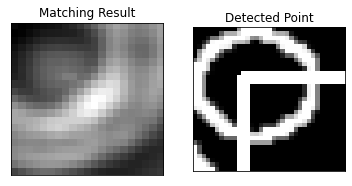

0.4962235391139984


In [66]:
img =cv2.imread('sur_2_pipei0.png',0)
template = cv2.imread('muban12.png',0)
(x,y)=template.shape
img = cv2.resize(img,(y+20,x+20))
rv = cv2.matchTemplate(img,template,cv2.TM_CCOEFF_NORMED)
minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(rv)
topLeft = maxLoc
bottomRight = (topLeft[0] + tw, topLeft[1] + th)
cv2.rectangle(img,topLeft, bottomRight, 255, 2)
plt.subplot(121),plt.imshow(rv,cmap = 'gray')
plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img,cmap = 'gray')
plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
plt.show()
if maxVal>0.4:
    flag=1
print(maxVal)

In [75]:
i=0
h1 = int(locs[i][2])
h2=  int(locs[i][3])
x_center = locs[i][0]-1
y_center = locs[i][1]-1
print([x_center-h1, y_center-h2])
draw_1 = cv2.rectangle(shrink_o, (x_center, y_center), (x_center+h1, y_center+h2), (0, 255, 0), 2)
cv_show('d',draw_1)

[157, 157]


[(179, 178, 24, 22), (157, 125, 7, 9), (160, 120, 6, 6)]

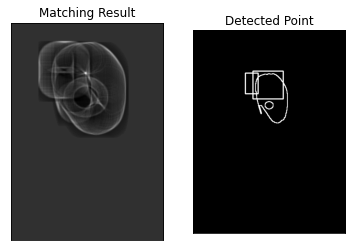

In [27]:
#使用函数cv2.matchTemplate()进行模板匹配。要求参数method 的值设置为cv2.TM_SQDIFF，显示函数的返回结果及匹配结果。

img = binary

template = cv2.imread('muban16.png',0)
th, tw = template.shape[::]
rv = cv2.matchTemplate(img,template,cv2.TM_CCOEFF_NORMED)
minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(rv)
topLeft = maxLoc
bottomRight = (topLeft[0] + tw, topLeft[1] + th)
cv2.rectangle(img,topLeft, bottomRight, 255, 2)
plt.subplot(121),plt.imshow(rv,cmap = 'gray')
plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img,cmap = 'gray')
plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
plt.show()
cv_show('s',img)

In [72]:
minVal

-0.24202576279640198

(113, 624)

In [13]:
def cv_show(name,img):
    cv2.imshow(name,img)   #显示原图
    if cv2.waitKey(0) == 27:
        cv2.destroyAllWindows()
    if cv2.waitKey(0):
        cv2.destroyAllWindows()

In [60]:
cv2.imwrite('rgb_img.jpg', img)   #将图像保存成jpg文件

True

In [80]:
cut=img[0:50,0:200]
cv_show('ma',cut)


In [40]:
img = cv2.imread('tu_.png')
dim = (32, 32)
resized = cv2.resize(img,dim, interpolation = cv2.INTER_AREA)
#cv_show('ma',resized)
cv2.imwrite('rgb_img.jpg', resized)   #将图像保存成jpg文件

True

In [105]:
dst

array([[22, 23, 23, ..., 77, 75,  0],
       [23, 25, 24, ..., 72, 75,  0],
       [24, 25, 25, ..., 70, 72,  0],
       ...,
       [77, 77, 76, ..., 38, 38,  0],
       [76, 77, 75, ..., 38, 38,  0],
       [76, 76, 75, ..., 39, 39,  0]], dtype=uint8)

# 图像grabcut抓前景背景

In [14]:
#grabCut分割
from matplotlib import pyplot as plt
img = cv2.imread('tu_.png')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#gray = cv2.equalizeHist(gray)#均衡
#gray = cv2.GaussianBlur(gray, (5, 5), 0)#高斯滤波

# 创建于读入图像，相同大小的掩模
mask = np.zeros(img.shape[:2],np.uint8)
 
# 创建以0填充的前景和背景模型
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)
 
rect = (21,1,660,428)
cv2.grabCut(img, mask, rect, bgdModel,fgdModel,6,cv2.GC_INIT_WITH_RECT)
 
# 此时的掩模已经变成了0-3之间的数字，
mask2 = np.where((mask == 2) | (mask == 0),0,1).astype('uint8')
 
img1 = img * mask2[:,:,np.newaxis]
 
#plt.subplot(121),plt.imshow(img1)
#plt.title("grabcut"),plt.xticks([]),plt.yticks([])
 
#plt.subplot(122),plt.imshow(gray)
#plt.title("original"),plt.xticks([]),plt.yticks([])
gray = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY);
gray = cv2.GaussianBlur(gray, (5, 5), 0)#高斯滤波


plt.show()
cv_show('German',gray)

In [84]:
cv_show('s',img)

In [15]:
import cv2 as cv
import numpy as np
IMG=img1;

k = np.ones((4, 4), np.uint8)
black = cv.morphologyEx(IMG, cv.MORPH_BLACKHAT, k)
top = cv.morphologyEx(IMG, cv.MORPH_TOPHAT, k)

cv.imshow("image1", IMG)
cv.imshow("image2", IMG)
cv.imshow("black", black)
cv.imshow("top", top)
cv.imshow("IMG-top", IMG-top)
cv.waitKey()
cv.destroyAllWindows()


# 最大联通域

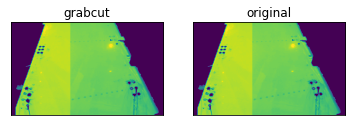

In [16]:
gray = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
gray_o=gray
contours,hierarchy = cv2.findContours(gray,cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
 
#找到最大区域并填充
 
area = []
 
for j in range(len(contours)):
 
    area.append(cv2.contourArea(contours[j]))
 
max_idx = np.argmax(area)
 
max_area = cv2.contourArea(contours[max_idx])
 
for k in range(len(contours)):
 
    if k != max_idx:
        cv2.fillPoly(gray, [contours[k]], 0)
plt.subplot(121),plt.imshow(gray)
plt.title("grabcut"),plt.xticks([]),plt.yticks([])
 
plt.subplot(122),plt.imshow(gray_o)
plt.title("original"),plt.xticks([]),plt.yticks([])



plt.show()
cv_show("IMG-top1",gray)
cv_show("IMG-top2",gray_o)

In [17]:
import cv2 as cv
IMG=gray;

#k = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
k = np.ones((4, 4), np.uint8)
open = cv.morphologyEx(IMG, cv.MORPH_OPEN, k)
close = cv.morphologyEx(IMG, cv.MORPH_CLOSE, k)

cv.imshow("image", IMG)
cv.imshow("image", IMG)
cv.imshow("opening", open)
cv.imshow("closeing", close)

cv.waitKey()
cv.destroyAllWindows()

In [19]:
thresh = cv2.threshold(close, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
cv_show('thresh', thresh)

In [20]:
k = np.ones((4, 4), np.uint8)
thresh = cv2.threshold(close, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
thresh = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, k)
binary=thresh
dst = cv2.Laplacian(binary, cv2.CV_16S, ksize = 3)
Laplacian = cv2.convertScaleAbs(dst)
ret, binary = cv2.threshold(Laplacian, 127, 255, cv2.THRESH_BINARY)
cv_show('close_2', thresh)

# 求边缘

In [21]:
binary=thresh
dst = cv2.Laplacian(binary, cv2.CV_16S, ksize = 3)
Laplacian = cv2.convertScaleAbs(dst)
ret, binary = cv2.threshold(Laplacian, 127, 255, cv2.THRESH_BINARY)
cv_show('Marr',binary)#Marr求边缘

In [22]:
threshCnts=[]
hierarchy=[]
threshCnts, hierarchy = cv2.findContours(thresh.copy(), cv2.RETR_LIST,	cv2.CHAIN_APPROX_SIMPLE)
 
cnts = threshCnts
cur_img = img.copy()
cv2.drawContours(cur_img, cnts, -1, (0, 0, 255), 3)
cv_show('img', cur_img)
 
 
locs = []


In [95]:
cnts

(array([[[ 71, 384]],
 
        [[ 72, 383]],
 
        [[ 75, 383]],
 
        [[ 76, 384]],
 
        [[ 76, 387]],
 
        [[ 78, 387]],
 
        [[ 80, 385]],
 
        [[ 83, 385]],
 
        [[ 84, 386]],
 
        [[ 84, 389]],
 
        [[ 83, 390]],
 
        [[ 83, 403]],
 
        [[ 82, 404]],
 
        [[ 78, 404]],
 
        [[ 77, 403]],
 
        [[ 77, 397]],
 
        [[ 76, 396]],
 
        [[ 76, 394]],
 
        [[ 73, 391]],
 
        [[ 73, 388]],
 
        [[ 72, 388]],
 
        [[ 71, 387]]], dtype=int32),
 array([[[ 76, 355]],
 
        [[ 79, 355]],
 
        [[ 80, 356]],
 
        [[ 81, 356]],
 
        [[ 86, 361]],
 
        [[ 86, 362]],
 
        [[ 87, 363]],
 
        [[ 87, 368]],
 
        [[ 85, 370]],
 
        [[ 83, 370]],
 
        [[ 83, 374]],
 
        [[ 82, 375]],
 
        [[ 78, 375]],
 
        [[ 74, 371]],
 
        [[ 72, 371]],
 
        [[ 69, 368]],
 
        [[ 69, 366]],
 
        [[ 68, 365]],
 
        [[ 68, 362]],
 
   

In [39]:
img = cv2.imread('tu_.png')
cv_show('ma',img)
num=0
locs=[]
for (i, c) in enumerate(cnts):
    # 计算矩形
    (x, y, w, h) = cv2.boundingRect(c)
    ar = w / float(h)
    # 选择合适的区域，根据实际任务来，这里的基本都是四个数字一组
    # [(454, 213, 110, 29), (308, 211, 109, 31), (171, 211, 98, 31), (18, 211, 107, 31)]
    #if 0.8< ar < 1.2:
    if (5< w < 60) and (5 < h < 60):
            # 符合的留下来
        locs.append((x, y, w, h))
        num=num+1
print(num) 
print(locs)

16
[(72, 381, 13, 25), (69, 356, 20, 21), (76, 330, 19, 16), (580, 327, 17, 16), (553, 311, 7, 6), (551, 303, 8, 6), (65, 302, 17, 15), (558, 300, 27, 47), (562, 278, 10, 9), (537, 277, 16, 14), (137, 142, 12, 9), (121, 142, 12, 9), (141, 128, 12, 8), (127, 128, 11, 9), (145, 115, 11, 8), (131, 115, 10, 8)]


In [283]:
name="muban"+str(i)+".png"

In [6]:
cv2.imwrite(name,)

AttributeError: module 'cv2' has no attribute 'iwrite'

error: OpenCV(4.6.0) :-1: error: (-5:Bad argument) in function 'imwrite'
> Overload resolution failed:
>  - imwrite() missing required argument 'img' (pos 2)
>  - imwrite() missing required argument 'img' (pos 2)


In [106]:
x=binary[x_center:(x_center+h1),y_center:(y_center+h2)]
cv_show('s',x)

error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:967: error: (-215:Assertion failed) size.width>0 && size.height>0 in function 'cv::imshow'


In [127]:
gg=600:610

SyntaxError: invalid syntax (<ipython-input-127-2c873a8cd339>, line 1)

In [149]:
for i in range(0,num):
    h1 = int(locs[i][2])+5
    h2=  int(locs[i][3])+5
    x_center = locs[i][0]-5
    y_center = locs[i][1]-5
    print([x_center-h1, y_center-h2])
    draw_0 = cv2.rectangle(img, (x_center, y_center), (x_center+h1, y_center+h2), (255, 0, 0), 2)
    name="muban"+str(i)+'.png'
    cv2.imwrite(name,binary[y_center:(y_center+h2),x_center:(x_center+h1)])   #将图像保存成jpg文件
    tep=binary[y_center:(y_center+h2),x_center:(x_center+h1)]
cv_show('German',draw_0)

[48, 352]
[39, 325]
[47, 304]
[553, 301]
[38, 277]
[521, 243]
[542, 259]
[511, 253]
[117, 123]
[99, 123]
[119, 110]
[107, 109]
[126, 97]
[111, 97]


In [2]:
def cv_show(name,img):
    cv2.imshow(name,img)   #显示原图
    if cv2.waitKey(0) == 27:
        cv2.destroyAllWindows()
    if cv2.waitKey(0):
        cv2.destroyAllWindows()

In [152]:
score=[]
res = cv2.matchTemplate(binary, tep, cv2.TM_CCOEFF)
(_, score, _, _) = cv2.minMaxLoc(res)
print(score)

2595664.0


In [145]:
y_center

322

In [83]:

X=binary[x_center:x_center+h1,y_center:y_center+h2]
cv_show(name,binary[x_center:x_center+h1,y_center:y_center+h2])
cv2.imwrite(name,X)

error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:967: error: (-215:Assertion failed) size.width>0 && size.height>0 in function 'cv::imshow'


In [81]:
cv2.imwrite('name',binary[x_center:x_center+h1,y_center:y_center+h2]) 

error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\imgcodecs\src\loadsave.cpp:801: error: (-215:Assertion failed) !_img.empty() in function 'cv::imwrite'


In [54]:
np.arange(x_center,x_center+h1)

array([575, 576, 577, 578, 579, 580, 581, 582, 583, 584, 585, 586, 587,
       588, 589, 590, 591, 592, 593, 594, 595, 596])

In [23]:
a=binary[10:15,20:25]
cv2.imwrite('name'，draw_0)
cv2.destroyAllWindows()

SyntaxError: invalid character in identifier (<ipython-input-23-9837ecce0d0d>, line 2)

In [144]:
a=binary[x_center:(x_center+h1),x_center:(x_center+h1)]

print(len(binary))
print(a)

429
[]


In [143]:
binary

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

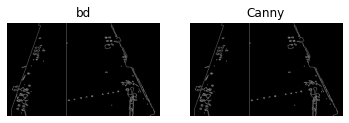

In [67]:
gaussianBlur=gray    
Canny = cv2.Canny(gaussianBlur, 50, 150)
ret, binary = cv2.threshold(Canny, 127, 255, cv2.THRESH_BINARY)
plt.subplot(121),plt.imshow(binary, cmap=plt.cm.gray ),plt.title('bd'), plt.axis('off')
plt.subplot(122), plt.imshow(Canny, cmap=plt.cm.gray), plt.title('Canny'), plt.axis('off')
cv_show('candy',Canny)


# 求边缘

In [43]:
binary=gray
dst = cv2.Laplacian(binary, cv2.CV_16S, ksize = 3)
Laplacian = cv2.convertScaleAbs(dst)
ret, binary = cv2.threshold(Laplacian, 127, 255, cv2.THRESH_BINARY)
cv_show('Marr',binary)#Marr求边缘

In [44]:
IMG=binary;
k = np.ones((2, 2), np.uint8)
IMG_erode = cv2.erode(IMG, k, iterations=1)
cv_show("image", IMG)
cv_show("erode", IMG_erode)#腐蚀

# 求轮廓

(-0.5, 701.5, 428.5, -0.5)

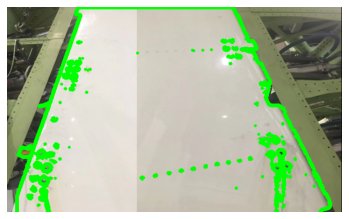

In [37]:
bin_img=IMG_erode
contours, hierarchy = cv2.findContours(bin_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

cv2.drawContours(img,contours,-1,(0,255,0),5)
plt.imshow(img[...,::-1])
plt.axis('off')


In [177]:
import cv2 as cv
import numpy as np
IMG=binary;

k = np.ones((4, 4), np.uint8)
black = cv.morphologyEx(IMG, cv.MORPH_BLACKHAT, k)
top = cv.morphologyEx(IMG, cv.MORPH_TOPHAT, k)

cv.imshow("image1", IMG)
cv.imshow("image2", IMG)
cv.imshow("black", black)
cv.imshow("top", top)
cv.imshow("IMG-top", IMG-top)
cv.waitKey()
cv.destroyAllWindows()

# 高斯滤波

In [100]:
 gray2 = cv2.GaussianBlur(gray, (5, 5), 0)
cv_show("a",gray2)

# 直方图均衡

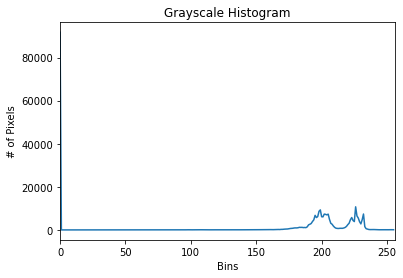

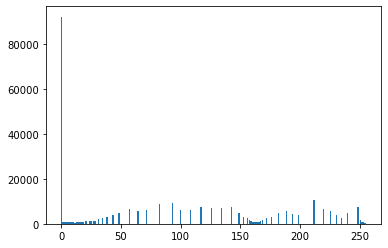

-1

In [261]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

'''
calcHist-计算图像直方图
函数原型：calcHist(images,channels,mask,histSize,ranges,hist=None,accumulate=None)
images：图像矩阵，例如：[image]
channels：通道数，例如：0
mask：掩膜，一般为：None
histSize：直方图大小，一般等于灰度级数
ranges：横轴范围
'''

# 获取灰度图像
img = gray

# 灰度图像的直方图
hist = cv2.calcHist([img],[0],None,[256],[0,256])
plt.figure()#新建一个图像
plt.title("Grayscale Histogram")
plt.xlabel("Bins")#X轴标签
plt.ylabel("# of Pixels")#Y轴标签
plt.plot(hist)
plt.xlim([0,256])#设置x坐标轴范围
plt.show()


'''
equalizeHist—直方图均衡化
函数原型： equalizeHist(src, dst=None)
src：图像矩阵(单通道图像)
dst：默认即可
'''
# 灰度图像直方图均衡化
dst = cv2.equalizeHist(img)

# 直方图
hist = cv2.calcHist([dst],[0],None,[256],[0,256])

plt.figure()
plt.hist(dst.ravel(), 256)
plt.show()

cv2.imshow("Histogram Equalization",np.hstack([img, dst]))
cv2.waitKey(0)


# 最大联通域

In [121]:
def useCanny(gaussianBlur):
    #using system function
    Canny = cv2.Canny(gaussianBlur, 50, 150)
    ret, binary = cv2.threshold(Canny, 127, 255, cv2.THRESH_BINARY)
    plt.subplot(121),plt.imshow(binary, cmap=plt.cm.gray ),plt.title('bd'), plt.axis('off')
    plt.subplot(122), plt.imshow(Canny, cmap=plt.cm.gray), plt.title('Canny'), plt.axis('off')
    cv_show('candy',Canny)
    

In [30]:
#画矩形
h1 = 330
h2=214
x_center = 351
y_center = 214
print([x_center-h1, y_center-h2])
draw_0 = cv2.rectangle(img, (x_center-h1, y_center-h2), (x_center+h1, y_center+h2), (255, 0, 0), 2)
cv_show('German',draw_0)

[21, 0]


NameError: name 'cv_read' is not defined

In [58]:
cv_show('German',img)

# 图像腐蚀 

In [183]:
IMG=binary;
k = np.ones((2, 2), np.uint8)
IMG_erode = cv2.erode(IMG, k, iterations=1)
cv_show("image", IMG)
cv_show("erode", IMG_erode)                                          

# 图像膨胀

In [176]:
IMG=IMG_erode;
k = np.ones((3, 3), np.uint8)
img = cv2.dilate(IMG, k, iterations=3)
cv_show("image", IMG)
cv_show("erode", IMG_erode)


# 开闭运算

In [35]:
import cv2 as cv
IMG=img1;

k = np.ones((4, 4), np.uint8)
open = cv.morphologyEx(IMG, cv.MORPH_OPEN, k)
close = cv.morphologyEx(IMG, cv.MORPH_CLOSE, k)

cv.imshow("image", IMG)
cv.imshow("image", IMG)
cv.imshow("opening", open)
cv.imshow("closeing", close)

cv.waitKey()
cv.destroyAllWindows()


# 黑帽礼帽

# 最大联通域

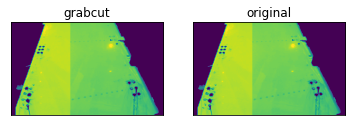

In [25]:
gray = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
gray_o=gray
contours,hierarchy = cv2.findContours(gray,cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
 
#找到最大区域并填充
 
area = []
 
for j in range(len(contours)):
 
    area.append(cv2.contourArea(contours[j]))
 
max_idx = np.argmax(area)
 
max_area = cv2.contourArea(contours[max_idx])
 
for k in range(len(contours)):
 
    if k != max_idx:
        cv2.fillPoly(gray, [contours[k]], 0)
plt.subplot(121),plt.imshow(gray)
plt.title("grabcut"),plt.xticks([]),plt.yticks([])
 
plt.subplot(122),plt.imshow(gray_o)
plt.title("original"),plt.xticks([]),plt.yticks([])



plt.show()
cv_show("IMG-top1",gray)
cv_show("IMG-top2",gray_o)